In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params
plot_utils.set_all_font_sizes(20)
from utils import roi_utils, default_paths, stats_utils

In [2]:
# Load results of the fitting procedure

subject = 1
volume_space=True
fitting_type = 'texture_pyramid_ridge_4ori_4sf_pca_HL'
# fitting_type = 'texture_pyramid_ridge_4ori_4sf_pca_HL_allsubsets'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out = load_fits.load_fit_results(subject, fitting_type, n_from_end=0, verbose=True);

roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 

skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def

fig_save_folder = None

loading from /user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf_pca_HL/Feb-05-2022_2057_18/all_fit_params.npy

dict_keys(['subject', 'volume_space', 'fitting_types', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'saved_prfs_fn', 'best_layer_each_voxel', 'saved_best_layer_fn', 'voxel_subset_is_done_trn', 'voxel_subset_is_done_val', 'corr_each_feature', 'sem_discrim_each_axis', 'sem_corr_each_axis', 'discrim_type_list', 'use_pca_pyr_feats_hl', 'pyramid_feature_info', 'group_all_hl_feats'])


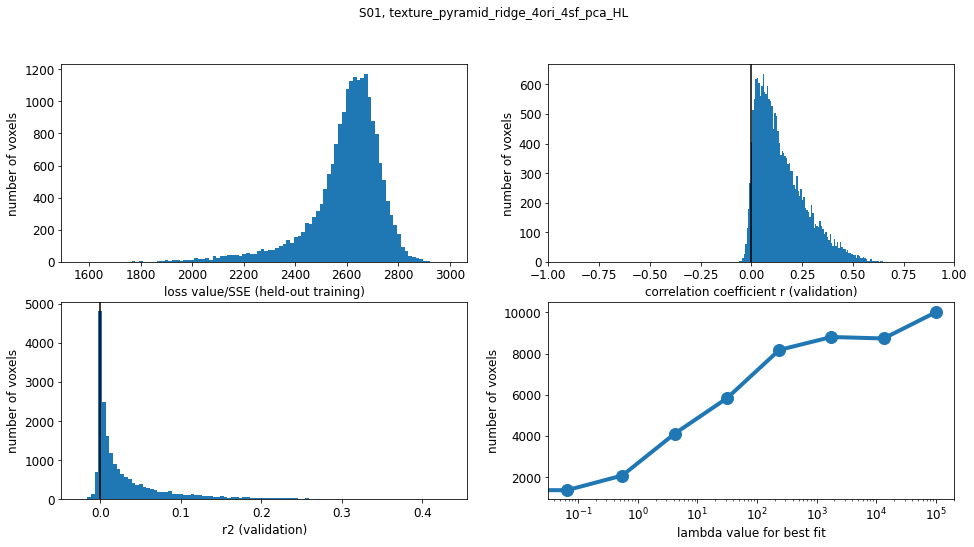

In [17]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_perf_summary(subject, fitting_type, out, fig_save_folder=fig_save_folder)

In [7]:
summary_plots.plot_summary_pycortex(subject, fitting_type, out, roi_def=roi_def, port=33333)

Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


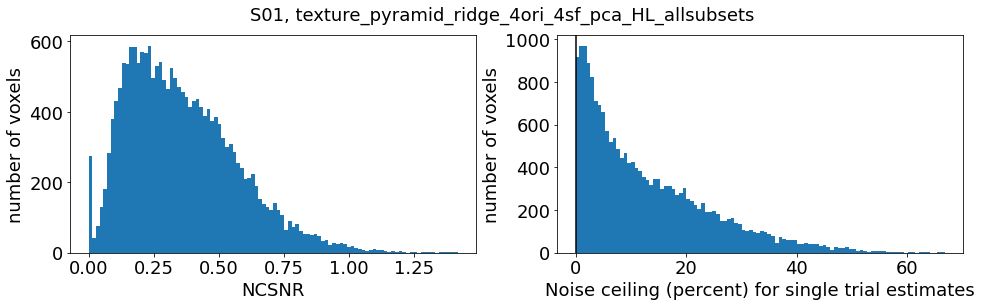

In [4]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_noise_ceilings(subject, fitting_type,out, fig_save_folder)

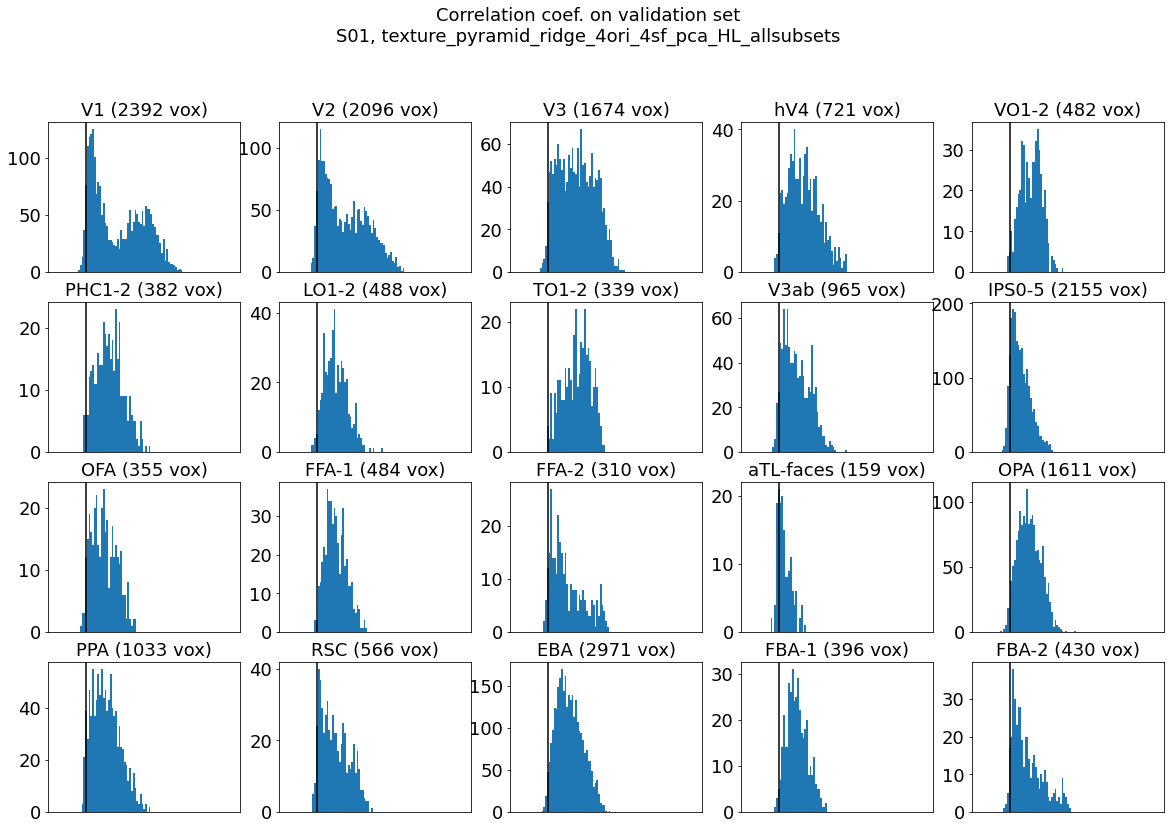

In [5]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_cc_each_roi(subject, fitting_type,out, roi_def=roi_def, skip_inds=skip_inds, \
                               fig_save_folder=fig_save_folder)

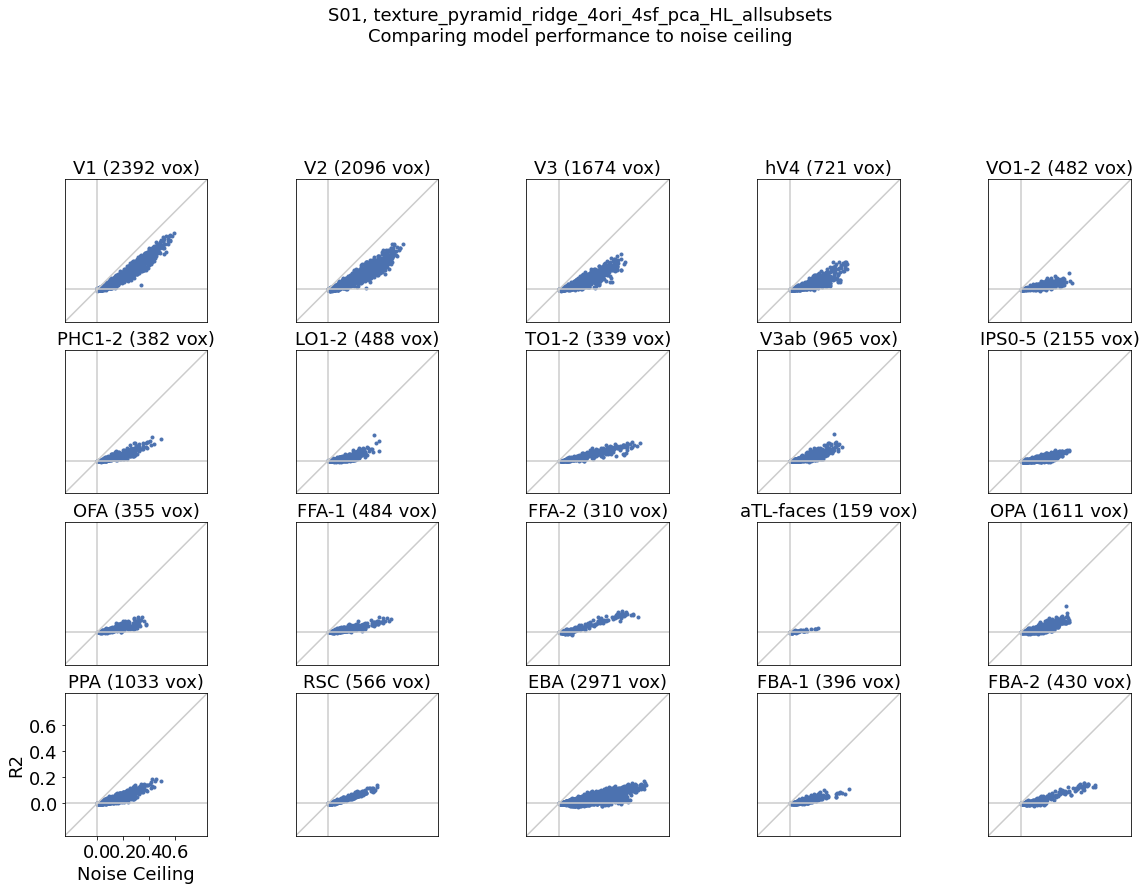

In [6]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_r2_vs_nc(subject, fitting_type,out, roi_def=roi_def, skip_inds=skip_inds, \
                            axlims = [-0.25, 0.85], fig_save_folder=fig_save_folder, fig_size=(20,24))

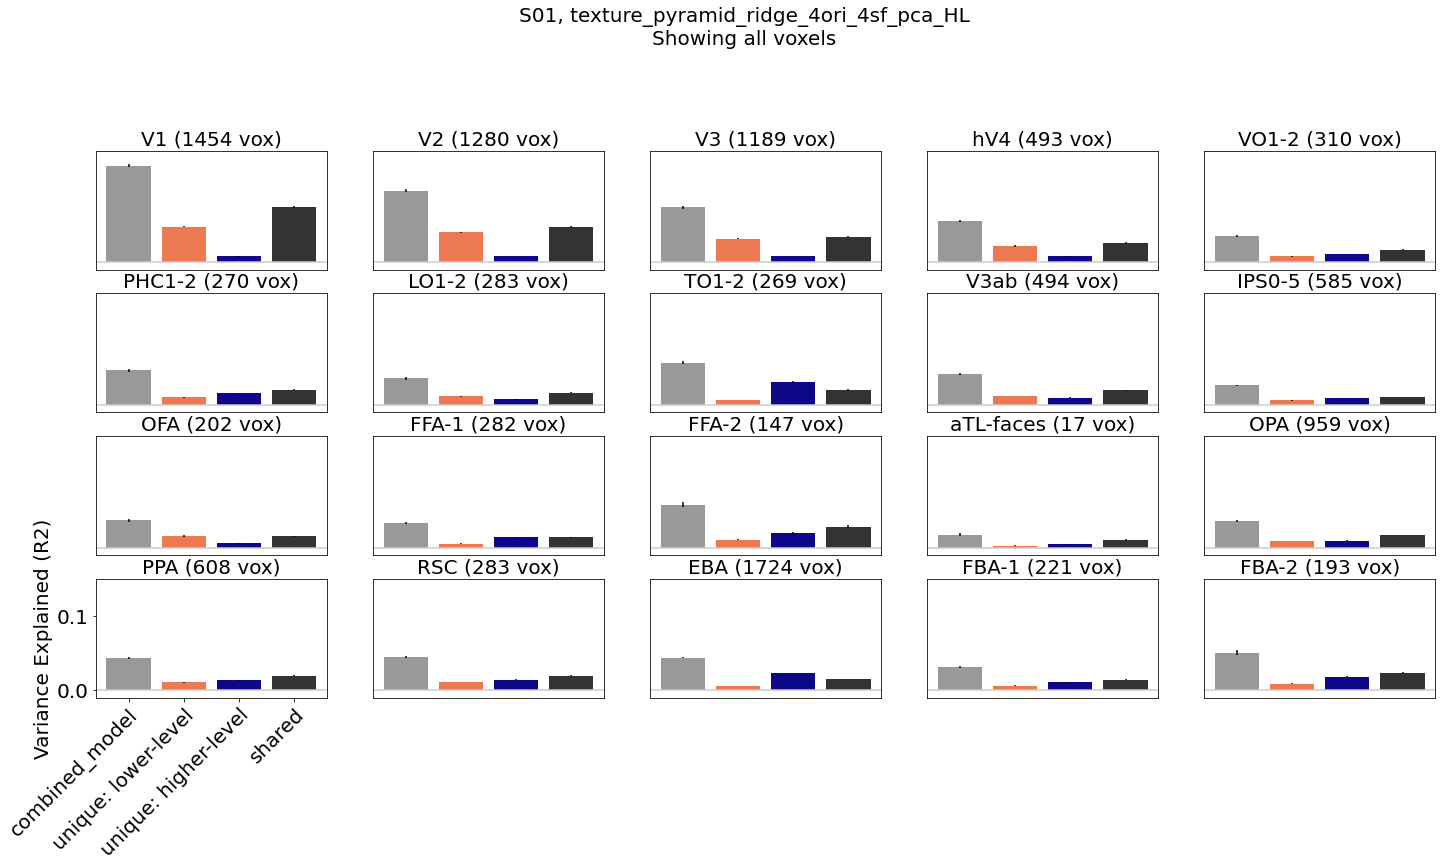

In [3]:
pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1].split('just_')[1]
name2 = out['partial_version_names'][pp2].split('just_')[1]
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,4))
colors = np.flipud(colors)
colors = np.concatenate((np.array([[0.6, 0.6, 0.6, 1]]), colors[[1,3],:], np.array([[0.2, 0.2, 0.2, 1]])), axis=0)

inds2use = val_r2[:,0]>0.01

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.01, 0.15])
plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, roi_def=roi_def, \
                               skip_inds=skip_inds,\
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)


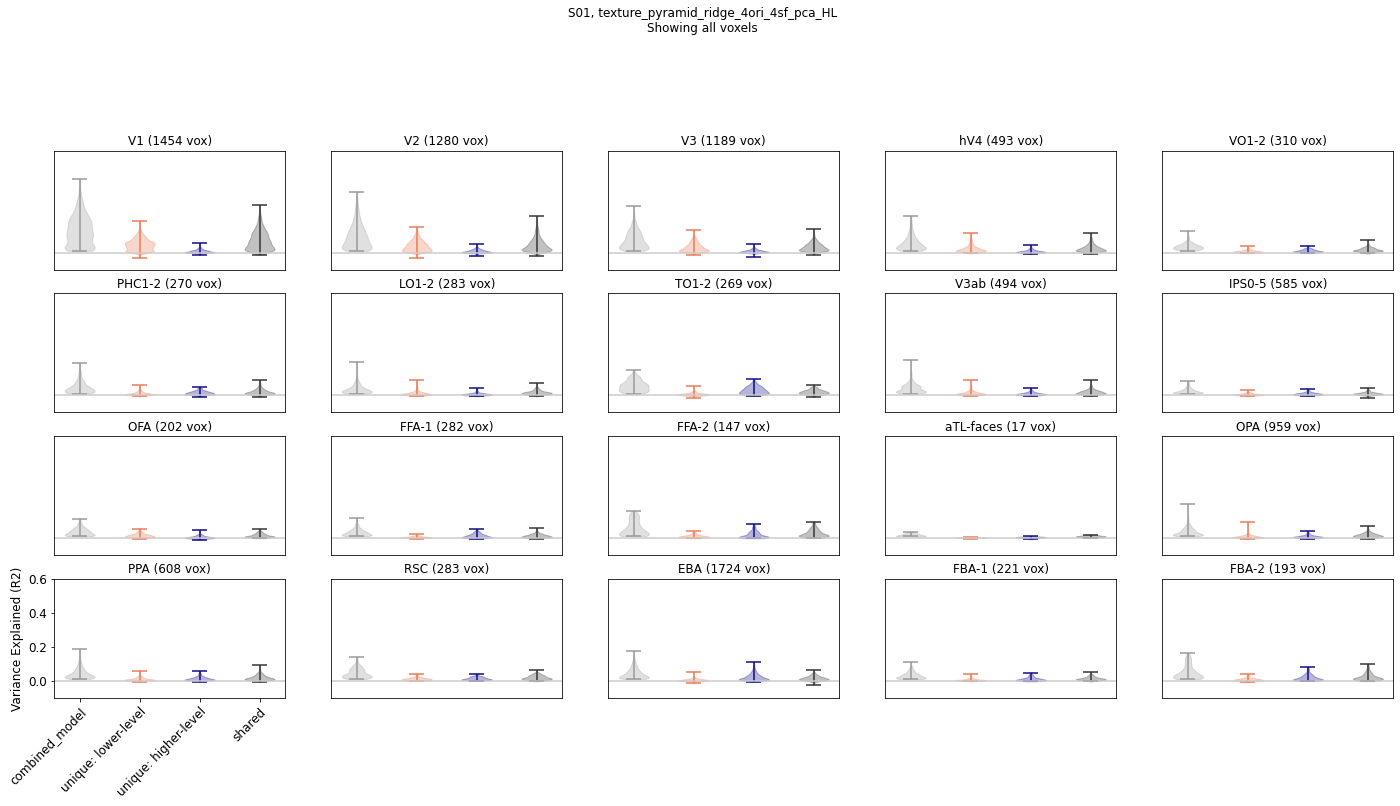

In [22]:
pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1].split('just_')[1]
name2 = out['partial_version_names'][pp2].split('just_')[1]
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,4))
colors = np.flipud(colors)
colors = np.concatenate((np.array([[0.6, 0.6, 0.6, 1]]), colors[[1,3],:], np.array([[0.2, 0.2, 0.2, 1]])), axis=0)

inds2use = val_r2[:,0]>0.01

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.10, 0.60])
plot_utils.create_roi_subplots(var_expl, inds2use, vp, subject, out, roi_def=roi_def, \
                               skip_inds=skip_inds,\
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_eachroi.png'))

In [3]:
# Make plots in pycortex for variance partitioning analysis
# Two-way variance partition, just low and high

import cortex

port=13333

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out, screen_eccen_deg=8.4)

names = ['pRF eccentricity (from alexnet FWRF)', 'pRF angle (from alexnet FWRF)', \
         'pRF size (from alexnet FWRF)']
maps = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins = [0,0,0]
maxes = [9, 360, 9]

names += ['Full model']
maps += [np.sqrt(out['val_r2'][:,0])]
cmaps += ['PuBu']
mins += [0]
maxes += [0.60]

pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1].split('just_')[1]
name2 = out['partial_version_names'][pp2].split('just_')[1]
val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

maps += [np.sqrt(val_r2[:,pp0]), np.sqrt(unique_a), np.sqrt(unique_b), np.sqrt(shared_ab)]
names += ve_names
cmaps += ['PuBu', 'PuBu', 'PuBu', 'PuBu']
mins += [0,0,0,0]
maxes += [0.4, 0.20, 0.20, 0.40]

max_ind = np.argmax(np.concatenate([unique_a[:,np.newaxis], unique_b[:,np.newaxis]], axis=1), axis=1)

names += ['Prefered feature type (based on unique var)']
maps += [(max_ind+1).astype(np.float32)]
cmaps += ['plasma_r']
mins += [0]
maxes += [2]

vox2plot = out['val_r2'][:,0]>0.01

plot_utils.plot_maps_pycortex(maps, names, subject, out, roi_def=roi_def, fitting_type=fitting_type, \
                              vox2plot=vox2plot,\
                              port=port, cmaps=cmaps, mins=mins, maxes=maxes)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


Data is in 3d volume space
navigate browser to: 127.0.0.1:13333
Started server on port 13333
Stopping server


In [ ]:
# Make plots in pycortex for variance partitioning analysis
# Full variance partition over all subsets

import cortex

port=13333

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out, screen_eccen_deg=8.4)

names = ['pRF eccentricity (from alexnet FWRF)', 'pRF angle (from alexnet FWRF)', \
         'pRF size (from alexnet FWRF)']
maps = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins = [0,0,0]
maxes = [9, 360, 9]

names += ['Full model']
maps += [np.sqrt(out['val_r2'][:,0])]
cmaps += ['PuBu']
mins += [0]
maxes += [0.60]

ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)

val_r2 = out['val_r2']
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
ve_names = ['Unique: ' + out['partial_version_names'][ff].split('leave_out_')[1] \
                             for ff in ff_inds]

# names = ['Prefered feature type (based on unique var)'] + ve_names
names += ve_names
maps += [np.sqrt(var_expl[:,ff]) for ff in range(n_submodels)]
cmaps += ['PuBu' for ff in range(n_submodels)]
mins += [0 for ff in range(n_submodels)]
maxes += [0.2 for ff in range(n_submodels)]

vox2plot = out['val_r2'][:,0]>0.01

plot_utils.plot_maps_pycortex(maps, names, subject, out, roi_def=roi_def, vox2plot=vox2plot, \
                              fitting_type=fitting_type, \
                              port=port, cmaps=cmaps, mins=mins, maxes=maxes)



In [7]:
np.where([ff=='highpass_resid_autocorrs' for ff in feature_types_all])
feature_type_dims_all[7]

25

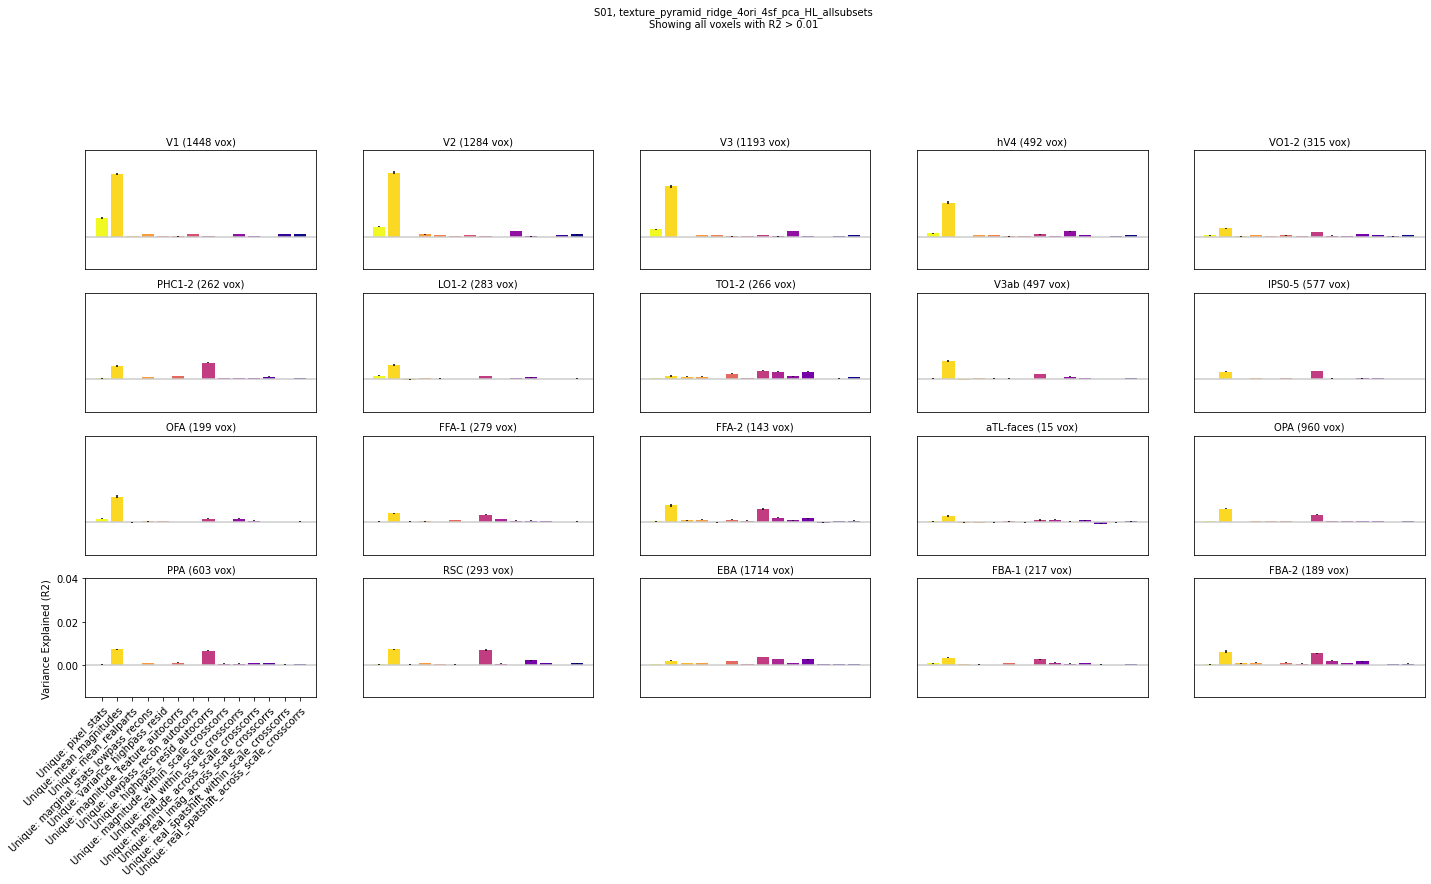

In [18]:
plot_utils.set_all_font_sizes(fs = 10)
r2_cutoff = 0.01
val_r2 = out['val_r2']

ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)

var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
ve_names = ['Unique: ' + out['partial_version_names'][ff].split('leave_out_')[1] \
                             for ff in ff_inds]
colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)
# graycolor = np.array([0.6, 0.6, 0.6, 1])
# colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)

inds2use = val_r2[:,0]>r2_cutoff

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', plot_errorbars=True, \
                  horizontal_line_pos=0, ylims=[-0.015, 0.04])

plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, roi_def=roi_def, skip_inds=skip_inds, \
                    suptitle='S%02d, %s\nShowing all voxels with R2 > %.2f'%(subject, fitting_type, r2_cutoff))

plt.gcf().subplots_adjust(bottom=0.5)


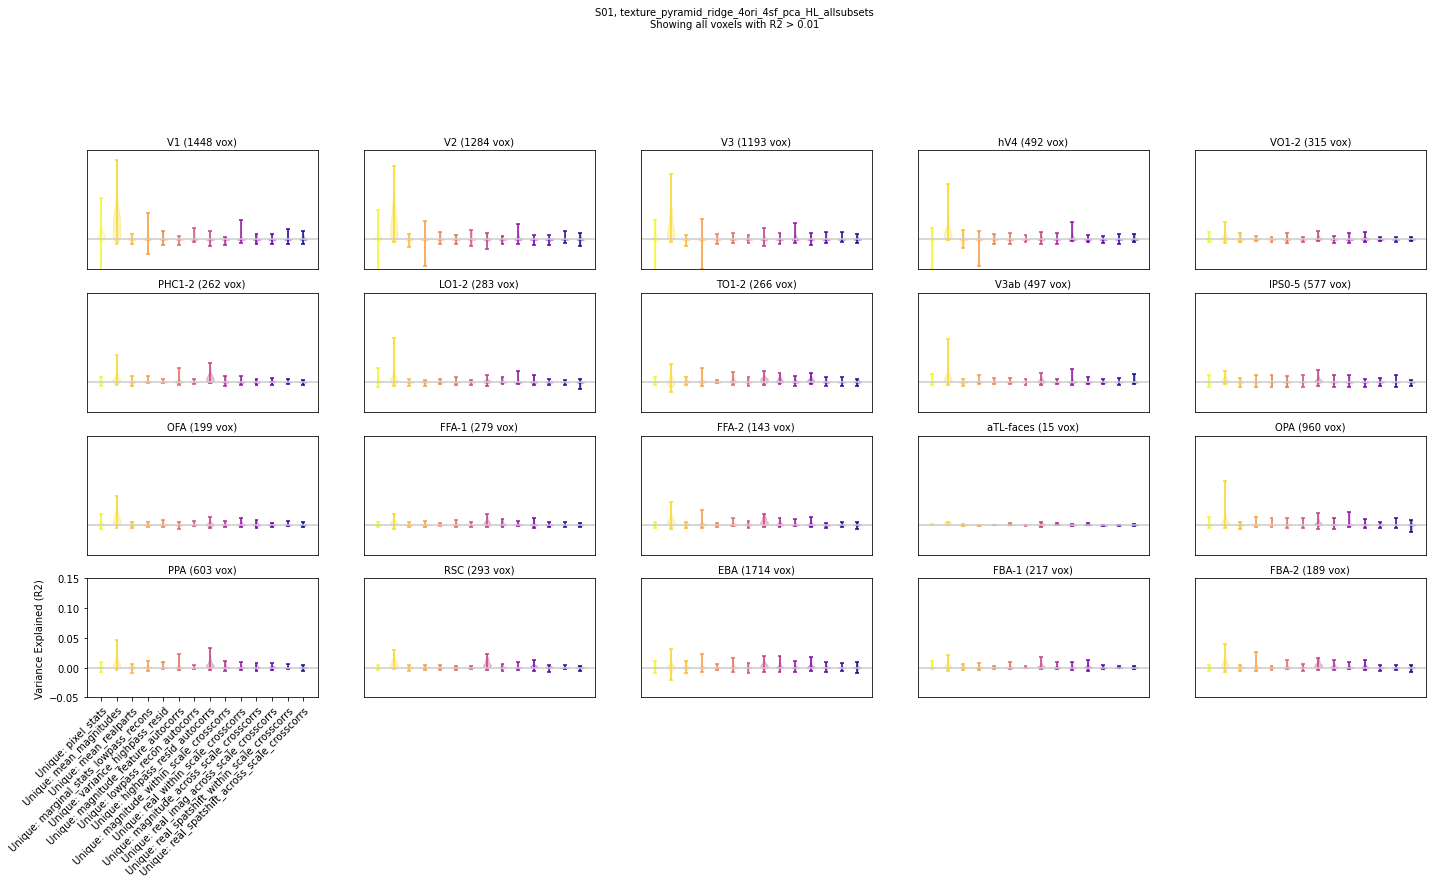

In [13]:
plot_utils.set_all_font_sizes(fs = 10)
r2_cutoff = 0.01
val_r2 = out['val_r2']

ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)

var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
ve_names = ['Unique: ' + out['partial_version_names'][ff].split('leave_out_')[1] \
                             for ff in ff_inds]
colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)
# graycolor = np.array([0.6, 0.6, 0.6, 1])
# colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)

inds2use = val_r2[:,0]>r2_cutoff

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)',\
                  horizontal_line_pos=0, ylims=[-0.050, 0.150])

plot_utils.create_roi_subplots(var_expl, inds2use, vp, subject, out, roi_def=roi_def, skip_inds=skip_inds, \
                    suptitle='S%02d, %s\nShowing all voxels with R2 > %.2f'%(subject, fitting_type, r2_cutoff))

plt.gcf().subplots_adjust(bottom=0.5)


In [4]:
# check if variance explained is related at all to the dim of features


feature_types_all = ['pixel_stats', 'mean_magnitudes', 'mean_realparts', \
                     'marginal_stats_lowpass_recons', 'variance_highpass_resid', \
                     'magnitude_feature_autocorrs', 'lowpass_recon_autocorrs', 'highpass_resid_autocorrs', \
                     'magnitude_within_scale_crosscorrs', 'real_within_scale_crosscorrs', \
                     'magnitude_across_scale_crosscorrs', 'real_imag_across_scale_crosscorrs', \
                     'real_spatshift_within_scale_crosscorrs', 'real_spatshift_across_scale_crosscorrs']
feature_type_dims_all = [6,16,16,10,1,272,73,25,24,24,48,96,10,20]


Text(0, 0.5, 'n features in subset (before PCA)')

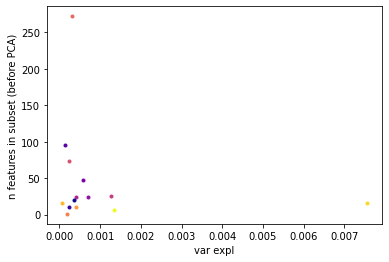

In [15]:
val_r2 = out['val_r2']
ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
plt.figure();
for ff in range(n_submodels):
    plt.plot(np.mean(var_expl[:,ff], axis=0), feature_type_dims_all[ff],'.',color=colors[ff,:])
    
plt.xlabel('var expl')
plt.ylabel('n features in subset (before PCA)')

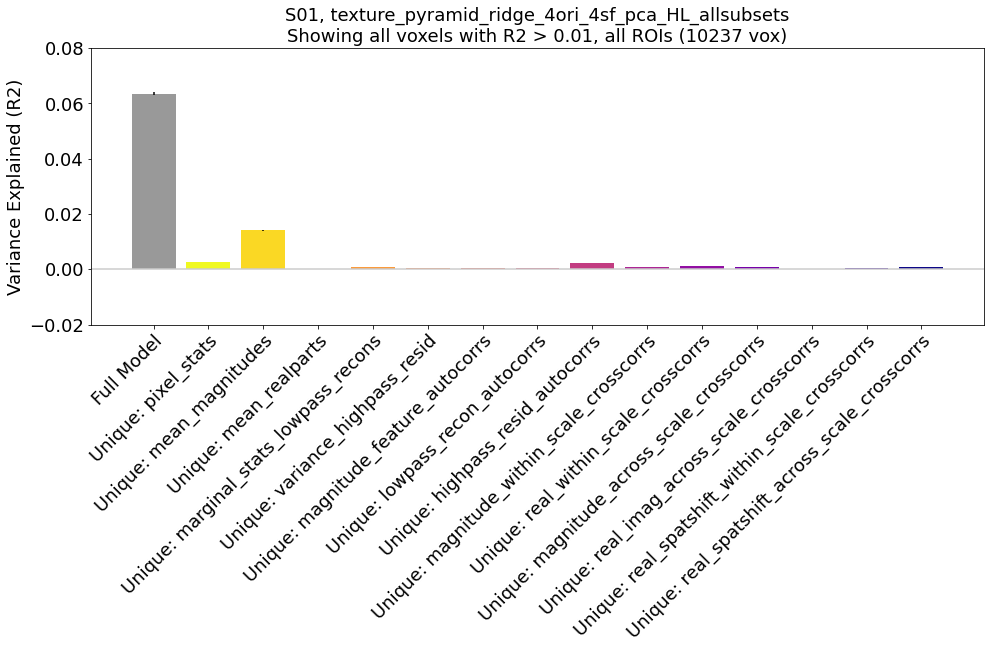

In [11]:
r2_cutoff=0.01

plot_utils.set_all_font_sizes(fs = 18)
val_r2 = out['val_r2']
ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)

# Compute variance explained by each feature type - how well does the model without that feature type
# do, compared to the model with all features? 
# (subtract later columns from the first column)
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
var_expl = np.concatenate([val_r2[:,0:1], var_expl], axis=1)
ve_names = ['Full Model'] + ['Unique: ' + out['partial_version_names'][ff].split('leave_out_')[1] \
                             for ff in ff_inds]

colors = cm.plasma(np.linspace(0,1,len(ve_names)-1))
graycolor = np.array([0.6, 0.6, 0.6, 1])
colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)


inds2use = out['val_r2'][:,0]>r2_cutoff

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels with R2 > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        r2_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.02, 0.08])
bp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'bars_uniq_var_texturefeat_allrois.png'))
    plt.savefig(os.path.join(fig_save_folder,'bars_uniq_var_texturefeat_allrois.pdf'))


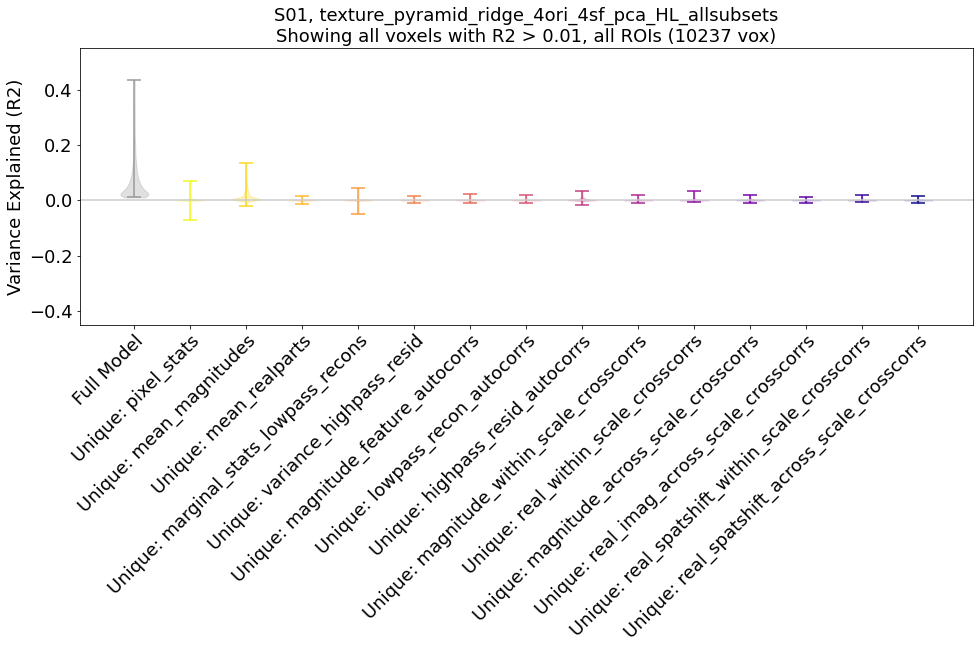

In [10]:
plot_utils.set_all_font_sizes(fs = 18)
r2_cutoff = 0.010
val_r2 = out['val_r2']
ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)

# Compute variance explained by each feature type - how well does the model without that feature type
# do, compared to the model with all features? 
# (subtract later columns from the first column)
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
var_expl = np.concatenate([val_r2[:,0:1], var_expl], axis=1)
ve_names = ['Full Model'] + ['Unique: ' + out['partial_version_names'][ff].split('leave_out_')[1] \
                             for ff in ff_inds]

colors = cm.plasma(np.linspace(0,1,len(ve_names)-1))
graycolor = np.array([0.6, 0.6, 0.6, 1])
colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)

inds2use = out['val_r2'][:,0]>r2_cutoff

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels with R2 > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        r2_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.45, 0.55])
vp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)


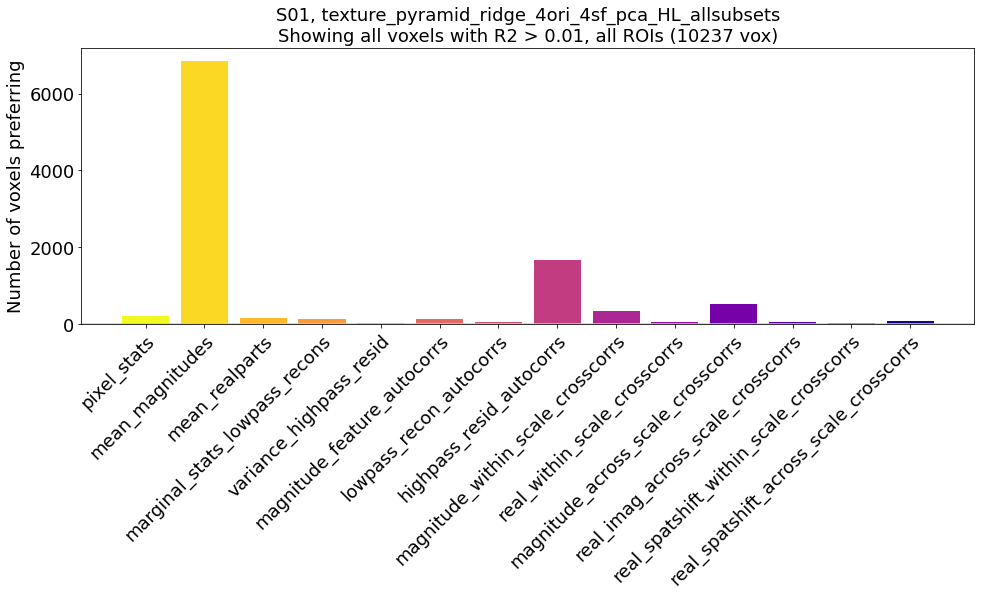

In [13]:
plot_utils.set_all_font_sizes(fs = 18)
r2_cutoff = 0.01

ff_inds = np.arange(15,29)
n_submodels = len(ff_inds)
n_feature_types = n_submodels

# Compute variance explained by each feature type - how well does the model without that feature type
# do, compared to the model with all features? 
# (subtract later columns from the first column)
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_submodels]) - val_r2[:,ff_inds] 
max_ve  = np.argmax(var_expl, axis=1)

inds2use = out['val_r2'][:,0]>r2_cutoff

unvals = np.arange(0,n_feature_types)
counts = np.array([np.sum(np.logical_and(max_ve==ff, inds2use)) for ff in unvals])
counts = counts[np.newaxis,:]

ve_names = [out['partial_version_names'][ff].split('leave_out_')[1] \
                             for ff in ff_inds]
colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Number of voxels preferring', \
                 title='S%02d, %s\nShowing all voxels with R2 > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        r2_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=None)
bp.create(data=counts, new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
